# Here's the idea.

I want to make a publication-quality sigma vs. magnitude figure (possibly with `counts` in it).

WSERV7+8
Saving to /Users/tsrice/Documents/Variability_Project_2020/wuvars/figs_tables_for_overleaf/Figure_0_sigma_v_mag.pdf...


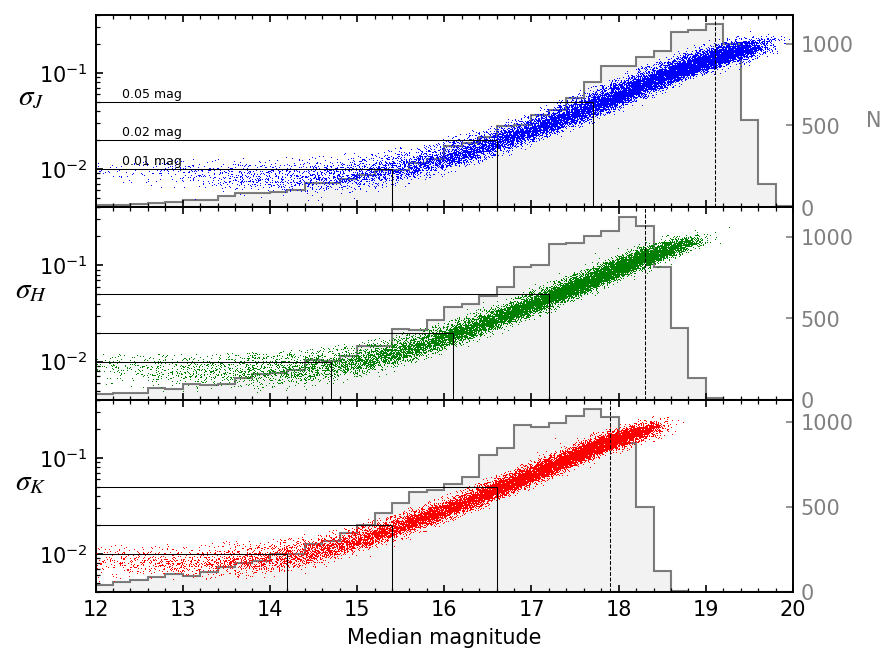

In [97]:
%run ../make_sigma_vs_mag_figs.py

Signature: ax.minorticks_on()
Docstring:
Display minor ticks on the Axes.

Displaying minor ticks may reduce performance; you may turn them off
using `minorticks_off()` if drawing speed is a problem.
File:      ~/miniforge3/envs/astropy/lib/python3.13/site-packages/matplotlib/axes/_base.py
Type:      method

In [48]:
ax.twinx?

Signature: ax.twinx()
Docstring:
Create a twin Axes sharing the xaxis.

Create a new Axes with an invisible x-axis and an independent
y-axis positioned opposite to the original one (i.e. at right). The
x-axis autoscale setting will be inherited from the original
Axes.  To ensure that the tick marks of both y-axes align, see
`~matplotlib.ticker.LinearLocator`.

Returns
-------
Axes
    The newly created Axes instance

Notes
-----
For those who are 'picking' artists while using twinx, pick
events are only called for the artists in the top-most Axes.
File:      ~/miniforge3/envs/astropy/lib/python3.13/site-packages/matplotlib/axes/_base.py
Type:      method

In [88]:
type(ds)

pandas.core.frame.DataFrame

In [98]:
from wuvars.publication_figures.HR_diagram_NGC_IC import load_isochrone_generic

In [109]:
myr_1 = load_isochrone_generic(1)

Mk_1 = myr_1[:, -1]
Mh_1 = myr_1[:, -2]
Mj_1 = myr_1[:, -3]
M = myr_1[:, 0]


In [102]:
Mk_1

array([8.36, 7.76, 7.35, 6.73, 6.35, 5.95, 5.67, 5.4 , 5.35, 5.27, 5.15,
       4.94, 4.81, 4.62, 4.29, 4.01, 3.71, 3.56, 3.16, 2.82, 2.57, 2.37,
       2.18, 2.04, 1.9 , 1.77, 1.66, 1.56, 1.46, 1.37])

In [103]:
distmod = 5 * np.log10(300) - 5


In [104]:
mk_1 = Mk_1 + distmod
mh_1 = Mk_1 + distmod
mj_1 = Mk_1 + distmod

In [105]:
mk_1

array([15.74560627, 15.14560627, 14.73560627, 14.11560627, 13.73560627,
       13.33560627, 13.05560627, 12.78560627, 12.73560627, 12.65560627,
       12.53560627, 12.32560627, 12.19560627, 12.00560627, 11.67560627,
       11.39560627, 11.09560627, 10.94560627, 10.54560627, 10.20560627,
        9.95560627,  9.75560627,  9.56560627,  9.42560627,  9.28560627,
        9.15560627,  9.04560627,  8.94560627,  8.84560627,  8.75560627])

In [106]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

def find_nearest_idx(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [128]:
limits_dict = {
        "J": [19.1, 17.7, 16.6, 15.4], 
        "H": [18.3, 17.2, 16.1, 14.7], 
        "K": [17.9, 16.6, 15.4, 14.2],
}
myr_1_dict = {"J": mj_1, "H": mh_1, "K": mk_1}

In [129]:
ages = [1, 10]
for age in ages:

    myr_x = load_isochrone_generic(age)

    Mk_x = myr_x[:, -1]
    Mh_x = myr_x[:, -2]
    Mj_x = myr_x[:, -3]
    M = myr_1[:, 0]

    mk_x = Mk_x + distmod
    mh_x = Mk_x + distmod
    mj_x = Mk_x + distmod

    myr_x_dict = {"J": mj_x, "H": mh_x, "K": mk_x}

    print(f"Age: {age}")

    for band in ['J', 'H', 'K']:
        mag = myr_x_dict[band]
        limits = limits_dict[band]
        for limit in limits:
            mag_interp = np.interp(limit, mag[::-1], M[::-1], right=np.nan)
            closest_mag = find_nearest(mag, limit)
            idx = find_nearest_idx(mag, limit)
            print(band, limit, f"({closest_mag:.1f})", f"{mag_interp:5.3f}", M[idx])
        print("")

    print("")

Age: 1
J 19.1 (15.7)   nan 0.01
J 17.7 (15.7)   nan 0.01
J 16.6 (15.7)   nan 0.01
J 15.4 (15.1) 0.013 0.015

H 18.3 (15.7)   nan 0.01
H 17.2 (15.7)   nan 0.01
H 16.1 (15.7)   nan 0.01
H 14.7 (14.7) 0.021 0.02

K 17.9 (15.7)   nan 0.01
K 16.6 (15.7)   nan 0.01
K 15.4 (15.1) 0.013 0.015
K 14.2 (14.1) 0.029 0.03


Age: 10
J 19.1 (18.3)   nan 0.01
J 17.7 (18.3) 0.012 0.01
J 16.6 (16.7) 0.015 0.015
J 15.4 (15.2) 0.027 0.03

H 18.3 (18.3) 0.010 0.01
H 17.2 (16.7) 0.013 0.015
H 16.1 (15.8) 0.018 0.02
H 14.7 (14.6) 0.056 0.06

K 17.9 (18.3) 0.011 0.01
K 16.6 (16.7) 0.015 0.015
K 15.4 (15.2) 0.027 0.03
K 14.2 (14.2) 0.082 0.08




In [118]:
np.interp(limit, mag[::-1], M[::-1])

np.float64(0.028638810864488936)

In [117]:
mag

array([15.74560627, 15.14560627, 14.73560627, 14.11560627, 13.73560627,
       13.33560627, 13.05560627, 12.78560627, 12.73560627, 12.65560627,
       12.53560627, 12.32560627, 12.19560627, 12.00560627, 11.67560627,
       11.39560627, 11.09560627, 10.94560627, 10.54560627, 10.20560627,
        9.95560627,  9.75560627,  9.56560627,  9.42560627,  9.28560627,
        9.15560627,  9.04560627,  8.94560627,  8.84560627,  8.75560627])

In [130]:
distmod

np.float64(7.385606273598313)